<a href="https://colab.research.google.com/github/AdamZafri/Eco-Drive/blob/main/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.18.0


#Loading dataset

In [2]:
from pandas.core import indexing
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv('/content/auto-mpg1.2.csv', names=column_names,
                      na_values = "?", comment='\t',
                      sep=",",index_col=False,skiprows=1)

dataset = raw_dataset.copy()
dataset.tail()

<ipython-input-2-8c3a0849f46f>:5: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  raw_dataset = pd.read_csv('/content/auto-mpg1.2.csv', names=column_names,


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
544,31.8,4,1496.0,101.0,1299.994672,13.0,2021,3
545,31.8,4,1496.0,101.0,1299.994672,13.0,2022,3
546,31.8,4,1496.0,101.0,1299.994672,13.0,2022,3
547,31.8,4,1496.0,101.0,1299.994672,13.0,2023,3
548,31.8,4,1496.0,101.0,1299.994672,13.0,2023,3


Check count of missing values for each column

In [3]:
dataset.isna().sum()

,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,6
Weight,0
Acceleration,0
Model Year,0
Origin,0


drop rows where we have missing values

In [4]:
dataset = dataset.dropna()
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,1589.386368,12.0,1970,1
1,15.0,8,350.0,165.0,1675.115256,11.5,1970,1
2,18.0,8,318.0,150.0,1558.542112,11.0,1970,1
3,16.0,8,304.0,150.0,1557.181336,12.0,1970,1
4,17.0,8,302.0,140.0,1564.438808,10.5,1970,1
...,...,...,...,...,...,...,...,...
544,31.8,4,1496.0,101.0,1299.994672,13.0,2021,3
545,31.8,4,1496.0,101.0,1299.994672,13.0,2022,3
546,31.8,4,1496.0,101.0,1299.994672,13.0,2022,3
547,31.8,4,1496.0,101.0,1299.994672,13.0,2023,3


In [5]:
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1) * 1.0
dataset['Europe'] = (origin == 2) * 1.0
dataset['Asia'] = (origin == 3) * 1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Asia
544,31.8,4,1496.0,101.0,1299.994672,13.0,2021,0.0,0.0,1.0
545,31.8,4,1496.0,101.0,1299.994672,13.0,2022,0.0,0.0,1.0
546,31.8,4,1496.0,101.0,1299.994672,13.0,2022,0.0,0.0,1.0
547,31.8,4,1496.0,101.0,1299.994672,13.0,2023,0.0,0.0,1.0
548,31.8,4,1496.0,101.0,1299.994672,13.0,2023,0.0,0.0,1.0


Divide dataset into training and testing parts

In [6]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [7]:
train_stats = train_dataset.describe()
train_stats

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Asia
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000
mean,27.986866,4.868664,440.559908,94.442396,1226.916193,14.879263,1985.852535,0.456221,0.124424,0.419355
std,11.205180,1.779738,430.192773,38.371018,398.152319,2.719111,16.743036,0.498655,0.330446,0.494023
min,10.000000,3.000000,68.000000,31.000000,649.997336,7.900000,1970.000000,0.000000,0.000000,0.000000
25%,19.000000,4.000000,119.000000,67.000000,887.679544,12.800000,1974.000000,0.000000,0.000000,0.000000
50%,27.000000,4.000000,250.000000,88.000000,1137.835532,14.600000,1978.000000,0.000000,0.000000,0.000000
75%,35.700000,6.000000,689.750000,110.000000,1506.946022,16.500000,2001.750000,1.000000,0.000000,1.000000
max,64.000000,8.000000,1797.000000,225.000000,2266.599224,24.800000,2025.000000,1.000000,1.000000,1.000000


Seprate output field from other fields

In [8]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [9]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,434.0,4.868664,1.779738,3.000000,4.000000,4.000000,6.000000,8.000000
Displacement,434.0,440.559908,430.192773,68.000000,119.000000,250.000000,689.750000,1797.000000
Horsepower,434.0,94.442396,38.371018,31.000000,67.000000,88.000000,110.000000,225.000000
Weight,434.0,1226.916193,398.152319,649.997336,887.679544,1137.835532,1506.946022,2266.599224
Acceleration,434.0,14.879263,2.719111,7.900000,12.800000,14.600000,16.500000,24.800000
Model Year,434.0,1985.852535,16.743036,1970.000000,1974.000000,1978.000000,2001.750000,2025.000000
USA,434.0,0.456221,0.498655,0.000000,0.000000,0.000000,1.000000,1.000000
Europe,434.0,0.124424,0.330446,0.000000,0.000000,0.000000,0.000000,1.000000
Asia,434.0,0.419355,0.494023,0.000000,0.000000,0.000000,1.000000,1.000000


#Model Training

In [10]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [11]:
model = build_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

**Set Up Early Stopping**

Early stopping helps prevent overfitting by stopping training when the validation error stops improving.

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


**Train the Model (100 Epochs + Early Stopping)**

Now, fit your model with 100 epochs and early stopping:

In [13]:
EPOCHS = 100

history = model.fit(
    normed_train_data, train_labels,
    epochs=EPOCHS, validation_split=0.2,
    verbose=1, callbacks=[early_stop]
    )

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 893.2376 - mae: 27.8316 - mse: 893.2376 - val_loss: 740.0131 - val_mae: 25.2879 - val_mse: 740.0131
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 775.6772 - mae: 25.7276 - mse: 775.6772 - val_loss: 653.9695 - val_mae: 23.6429 - val_mse: 653.9695
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 710.6605 - mae: 24.3370 - mse: 710.6605 - val_loss: 557.6230 - val_mae: 21.6898 - val_mse: 557.6230
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 637.0734 - mae: 22.7451 - mse: 637.0734 - val_loss: 453.9177 - val_mae: 19.3760 - val_mse: 453.9177
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 513.0302 - mae: 20.1405 - mse: 513.0302 - val_loss: 346.5176 - val_mae: 16.6808 - val_mse: 346.5176
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 381.3640 - mae: 17.4388 - mse: 381.3640 - val_loss: 247.5986 - val_mae: 13.7129 - val_mse: 247.5986
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms

#Model Testing

**Plot Training History (Loss & MAE Over Epochs)**

After training, plot loss and mean absolute error (MAE) to check performance:

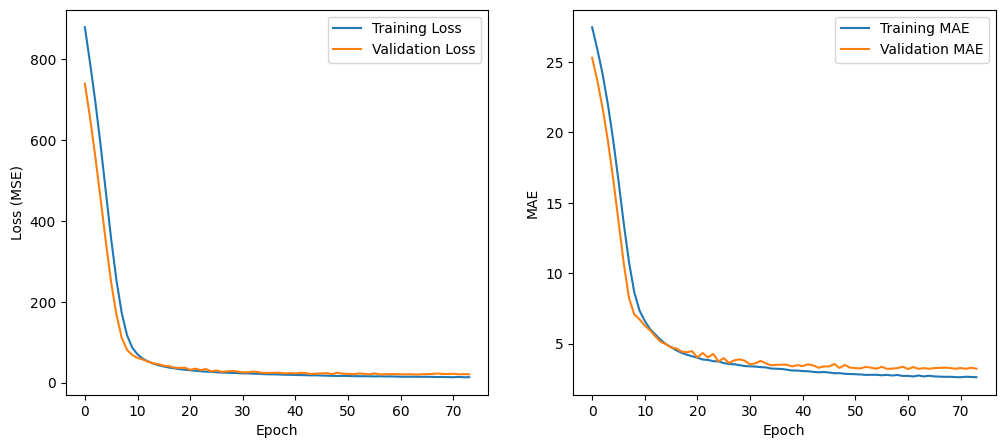

In [14]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = history.history
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(hist['loss'], label='Training Loss')
    plt.plot(hist['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()

    # Plot MAE
    plt.subplot(1, 2, 2)
    plt.plot(hist['mae'], label='Training MAE')
    plt.plot(hist['val_mae'], label='Validation MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()

    plt.show()

plot_history(history)


**Evaluate the Model on Test Data**

Once training is complete, check how well the model generalizes:

In [24]:
from sklearn.metrics import r2_score

# Get predictions from the model
test_predictions = model.predict(normed_test_data)
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

# Compute R² score
r2 = r2_score(test_labels, test_predictions)

# Print results
print(f"Test MAE: {mae:.2f} MPG")
print(f"R² Score: {r2:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 - 0s - 11ms/step - loss: 12.9348 - mae: 2.7025 - mse: 12.9348
Test MAE: 2.70 MPG
R² Score: 0.8818


In [16]:
example_batch = normed_test_data[:5]  # Take 5 random test samples
example_predictions = model.predict(example_batch)
print(example_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[[16.553442]
 [16.462431]
 [21.140434]
 [13.280111]
 [23.651718]]


In [17]:
test_labels

,MPG
0,18.0
9,15.0
23,26.0
28,9.0
31,25.0
...,...
521,42.6
527,42.6
533,49.0
534,53.5


**Compare Predictions vs. Actual Values**

In [18]:
import pandas as pd

# Take first 10 test samples
sample_indices = range(10)
sample_actual = test_labels.iloc[sample_indices]  # Get actual MPG values
sample_predictions = model.predict(normed_test_data.iloc[sample_indices]).flatten()  # Get predictions

# Display comparison
pd.DataFrame({"Actual MPG": sample_actual, "Predicted MPG": sample_predictions})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


,Actual MPG,Predicted MPG
0,18.0,16.553442
9,15.0,16.462431
23,26.0,21.140434
28,9.0,13.280111
31,25.0,23.651718
43,13.0,12.380782
44,13.0,12.203312
48,18.0,18.985346
49,23.0,25.899525
54,35.0,29.811161


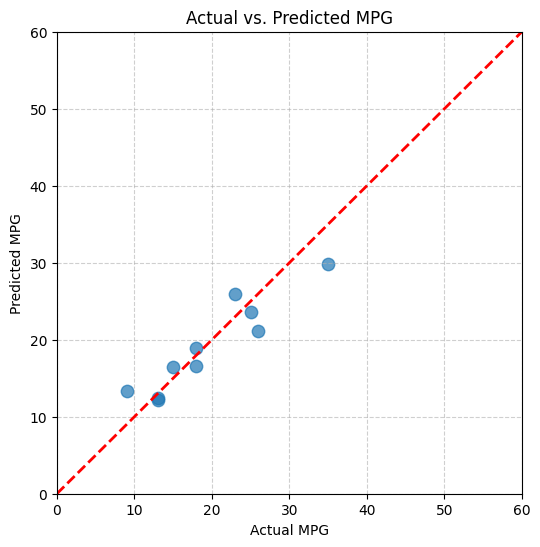

In [21]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,6))

plt.scatter(test_labels.iloc[sample_indices], sample_predictions, alpha=0.7, s=80)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs. Predicted MPG")

# Improve perfect prediction line
x_range = np.linspace(0, 60, 100)
plt.plot(x_range, x_range, color="red", linestyle="dashed", linewidth=2)

# Scale axes
plt.xlim([0, 60])
plt.ylim([0, 60])

# Grid for clarity
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

#Model Conversion

In [ ]:
kearas_file = "automobile.h5"
tf.keras.models.save_model(model,kearas_file)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
open("automobile.tflite","wb").write(tfmodel)

Saved artifact at '/tmp/tmpo61t5qsj'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 9), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  136094818407472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136094773542256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136094773538560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136094773539968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136094773540320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136094773539616: TensorSpec(shape=(), dtype=tf.resource, name=None)


21328